# Feature finding and activity annotation

---

**Updated on:** 2024-05-15

> Authors: Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): centroided .mzML, .csv file from data preparation set
> Output file(s): .csv files containing activity peak data, feature table containing activity annotated features, Feature Quantification table and .mgf file for feature based molecular networking.

**Please read the comments before proceeding to run the code of each cell and let us know if you run into any errors or find undocumented pieces of code.**

In [30]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pyopenms as oms


import sys
sys.path.append(r"..")
from src.microspotreader import *
%matplotlib widget

## User Input

Please input the path to your .mzML file in `mzml_upload` and the path to the prepared activity table in `spot_df_upload`. 

In [31]:
mzml_upload=r"../example_files/example_mzml.mzML"
spot_df_upload=Path(r"../example_files/activity_table.csv")

## Feature detection from .mzML file.

The feature detection workflow is based on pyopenms and uses parts of the untargeted metabolomics workflow found in their documentation. You can find more on this here: https://pyopenms.readthedocs.io/en/latest/user_guide/untargeted_metabolomics_preprocessing.html

For feature finding the following arguments can be changed:
- `mass_error_ppm` (line 3): Mass error of the MS in ppm
- `noise_threshold` (line 4): threshold below which signals are considered noise
- `min_fwhm_s` (line 7): minimum full width at half maximum for feature peaks
- `max_fwhm_s` (line 8): maximum fwhm for feature peaks

Additionally the list of adducts being checked can be changed in line 11+. For this please follow the guidelines for pyopenms.

In [32]:
feature_finder_settings={
    "mass_trace_detection": {
        "mass_error_ppm": 10,
        "noise_threshold": 1e5,
    },
    "elution_peak_detection": {
        "min_fwhm_s": 1,
        "max_fwhm_s": 60,
    },
    "adduct_detection": {
        "adduct_list": [
            b"H:+:0.4",
            b"Na:+:0.2",
            b"NH4:+:0.2",
            b"H3O1:+:0.1",
            b"CH2O2:+:0.1",
            b"H-2O-1:0:0.2",
        ]
    },
}

exp = oms.MSExperiment()
feature_finder = FeatureFinder(exp, mzml_upload)
feature_finder.change_settings_dict(feature_finder_settings)
feature_table = feature_finder.run()
feature_chroms = feature_finder.get_feature_traces()

feature_table

,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity
feature_id,,,,,,,,,
16129322888130881983,1,66.069396,152.994545,62.262018,72.089016,152.994385,153.993179,0.000068,5.551644e+06
3178429919169277094,1,66.069396,154.989776,62.262018,84.287520,154.989639,155.993774,0.001213,9.772083e+07
5777392337583480370,1,66.069396,182.984975,62.262018,83.833266,182.984787,184.985550,0.000579,4.529364e+07
8192763889614889956,1,66.069396,196.016593,62.262018,81.092142,196.016296,197.020432,0.000427,3.429527e+07
16772967979485504413,1,67.619268,219.966631,62.262018,83.833266,219.966461,220.969849,0.000397,3.087754e+07
18090228095336693181,1,94.054140,157.034697,66.798894,241.780890,157.034210,159.030548,0.000736,5.876348e+07
7985261466492331206,2,193.148268,179.089373,189.608892,209.443764,179.089218,179.591263,0.000179,1.359425e+07
3685215620370851222,2,193.148268,187.602719,189.608892,205.128522,187.602661,188.104401,0.000137,1.000485e+07
9552928564949554840,1,193.148268,374.151342,189.608892,206.358894,374.151215,375.154572,0.000271,1.943657e+07


## Peakdetection in Activity Chromatogram

The peak detection in the activity chromatogram occurs in the 2d heatmap instead of the 1d chromatogram to avoid counting visual artifacts from the assay as individual peaks.

The baseline noise is automatically estimated. Here you can specify convergence criteria for baseline estimation (`noise_convergence`, line 4). The lower the value is the smaller the resulting standard deviation will be and therefore also the peak threshold. If you wish to use a manual threshold please set `automatic_threshold` (line 3) to `False` and set the threshold with `manual_threshold` (line 5)

,Peak_No,RT,intensity,AUC,start_RT,end_RT
0,0,241.546444,1.884338,24.12226,226.333054,260.816736


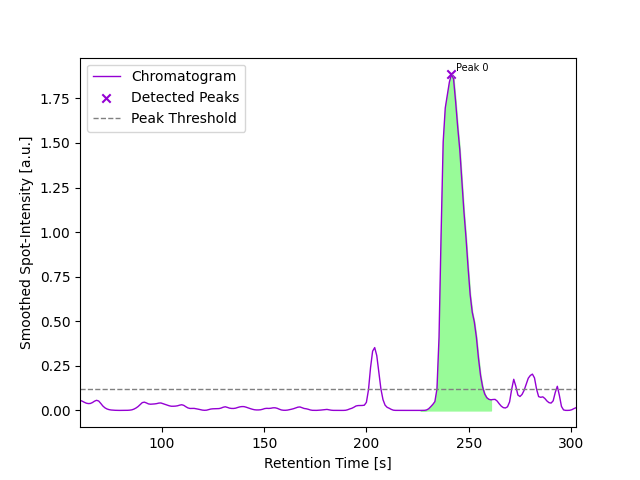

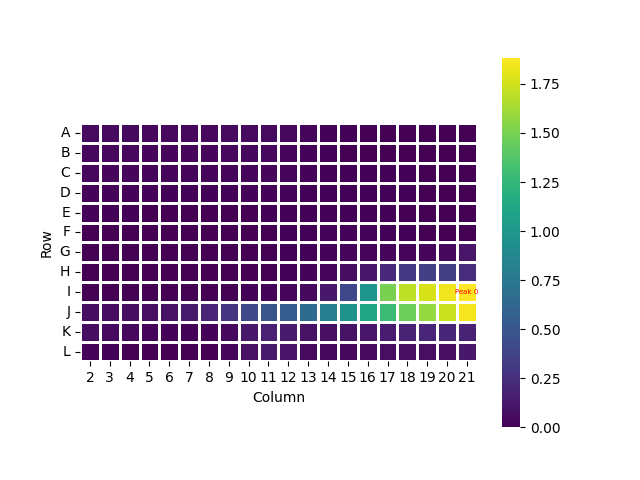

In [33]:
peak_detector_settings={
    "peak_detection": {
        "automatic_threshold": True,
        "noise_convergence": 0.02,
        "manual_threshold": 0.0,
        "minimum_SNR": 3,
    }
}

spot_df=pd.read_csv(spot_df_upload)

peak_detector = ActivityPeakDetector(spot_df)
peak_detector.change_settings_dict(
    peak_detector_settings
)
peak_list = peak_detector.run()
peak_df=peak_detector.get_peak_df()

peak_detector.plot_chromatogram()
peak_detector.plot_heatmap()
peak_df


## Annotation of the Feature Table with activity data

In this step the feature table is annotated with activity data based on retention time. Additionally the shapes of the feature peaks and the activity peaks are correlated by pearson correlation. The closer the pearson correlation coefficient is to 1 the more similar the 2 peak shapes are. This indicates a better fit of the feature peak to the activity peak.

For matching of retention time, a offset between the activity chromatogram and the features can be set if a bias exists in the experimental workflow (`bias_s` setting in line 4). The offset will be added onto the activity peaks retention time to find feature peaks. A negative value will therefore be subtracted from the activity peaks retention time. Additionally a RT tolerance can be set to change the size of the window in which features should be annotated with an activity peak (`window_s` setting in line 3). 

                      charge          RT          mz     RTstart       RTend  \
feature_id                                                                     
13212737319599630131       1  246.329514  332.105285  239.391636  342.552888   
16481318785472590896       1  245.846514  373.118932  241.780890  292.349136   
6321176270590421794        1  246.071646  410.097033  241.780890  264.527136   
11963276039769101319       1  246.071646  663.188694  241.780890  268.497264   
365933772440099313         1  246.071646  994.379429  241.780890  260.964636   
16781029804348937404       1  245.417640  245.097026  239.391636  270.350388   
8097565558756300972        1  246.071646  231.047954  239.391636  259.042140   

                         MZstart       MZend   quality     intensity  \
feature_id                                                             
13212737319599630131  332.105103  335.117157  0.736439  5.244452e+10   
16481318785472590896  373.118713  375.130219  0.015923  1.14677

c:\Users\Nomis\OneDrive\Documents\2_Master\5_Labrotations\AK-Petras\1_Microspotter\MicrospotReader\notebooks\..\src\microspotreader\feature_annotation\Peak.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_traces = pd.concat(


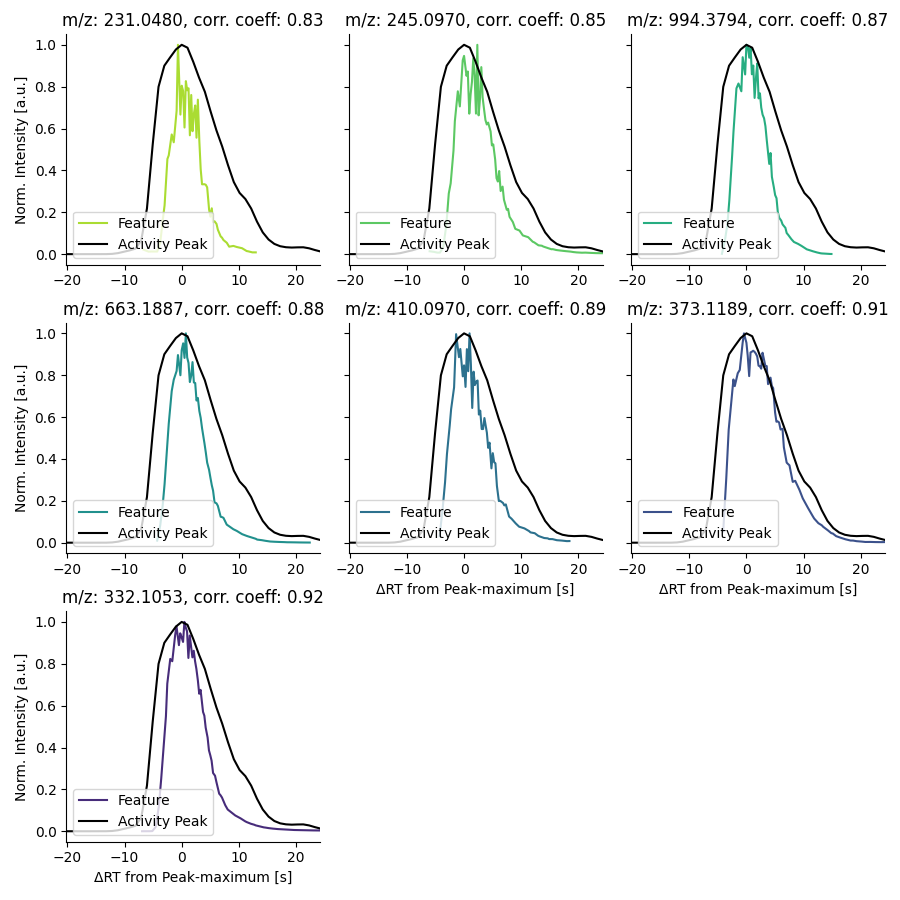

In [34]:
activity_annot_settings={
    "rt_correlation": {
        "window_s": 1, 
        "bias_s": 4
    }
}

activity_annot = ActivityAnnotator(
    feature_table, feature_chroms, peak_list, spot_df
)
activity_annot.change_settings_dict(
    activity_annot_settings
)
peak_list = activity_annot.run()

peak_fts={}
for peak in peak_list:
    peak_fts[peak.number]=peak.get_annotated_featuretable(feature_table).sort_values(f"correlation_peak{peak.number}", ascending=False)
    print(peak_fts[peak.number])

    if len(peak.correlated_feature_ids) > 0:
        peak.plot_feature_overlap(feature_table,feature_chroms,spot_df)
    

## Save Results
Run this cell to save the results as `.csv` files.

In [36]:
outputfolder = Path(r"../output")

if not outputfolder.exists():
    outputfolder.mkdir()

filename=spot_df_upload.name.split(".")[0]

for nr, ft in peak_fts.items():
    ft.to_csv(outputfolder/(filename+f"_features_peak{nr}.csv"))

peak_df.to_csv(outputfolder/(filename+"_peaks.csv"))
